# Worksheet 14

Name:  Emily Opresnick
UID: U91979014

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)
- P(Attribute B = Divorced | Class = Yes)
- P(Attribute C = High | Class = No)
- P(Attribute C = Mid | Class = Yes)

- P(Attribute A = Yes | Class = No) = 3/7
- P(Attribute B = Divorced | Class = Yes) = 1/3
- P(Attribute C = High | Class = No) = 3/7
- P(Attribute C = Mid | Class = Yes) = 1

b) Classify the following unseen records:

- (Yes, Married, Mid)
- (No, Divorced, High)
- (No, Single, High)
- (No, Divorced, Low)

- (Yes, Married, Mid) = 

P(Yes | C = yes)  * P(married | C= yes )* P( mid | C = yes) P(Yes) = 0

vs

P(Yes | C = no)  * P(married | C= no )* P( mid | C = no) P(no) = 0

this will be class no


- (No, Divorced, High) =

P(no | C = no)  * P(divorced | C= no )* P( high | C = no) P(no) = 4/7  * 1/2 * 3/3 * 7/10 =2/5

vs 

P(no | C = yes)  * P(divorced | C= yes )* P( high | C = no) P(yes) = 3/7 * 1/2 * 0 * 3/10 = 0

No


- (No, Single, High) =

P(no | C = no)  * P(single | C= no )* P( high | C = no) P(no) = 4/7*2/4*3/3*7/10 = 1/5

vs 

P(no | C = yes)  * P(single | C= yes )* P( high | C = yes) P(yes) = 3/7 *2/4 * 0 *3/10= 0

No


- (No, Divorced, Low) =

P(no | C = no)  * P(divorced | C= no )* P( low | C = no) P(no) = 4/7 * 1/2 * 3/3 *7/10 = 2/5 

vs 

P(no | C = yes)  * P(divorced | C= yes )* P( low | C = yes) P(yes) = 3/7 * 1/2 * 0 * 3/10 = 0 

No

### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

[[2 1]
 [3 4]]


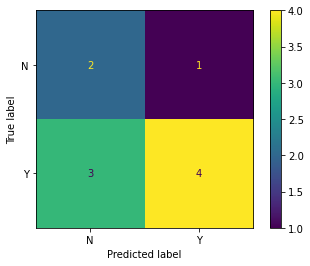

In [31]:
from sklearn import metrics

actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

def confusion_matrix(actual, predicted):
    matrix =  metrics.confusion_matrix(actual, predicted, labels = ['Yes', 'No'])
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['N', 'Y'])

    cm_display.plot()
    return matrix
print(confusion_matrix(actual_class, predicted_class))

b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

(-1 * 2) + (5 * 1) + (10 * 3) + (0 * 4) = 33

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

33

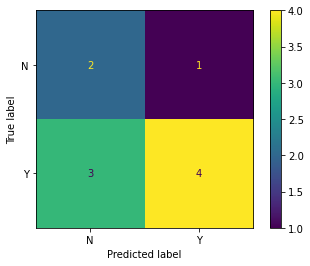

In [32]:
def cost(actual, predicted, cost_matrix):
    cost = 0
    con_matrix = confusion_matrix(actual, predicted)
    for i in range(len(con_matrix)):
        for j in range(2):
            cost += cost_matrix[i][j] * con_matrix[i][j]
    return cost

cost_matrix = [[-1, 5],[ 10, 0]]

cost(actual_class, predicted_class, cost_matrix)

d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

Accuracy of above example: 0.6
Precision of above example: 0.4
Recall of above example: 0.6666666666666666
F-measure of above example: 0.5


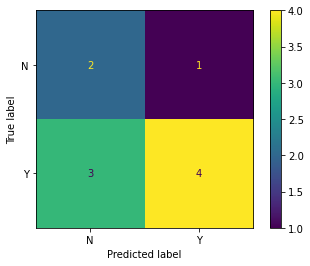

In [44]:
def accuracy(con_matrix):
    correct = con_matrix[0][0] + con_matrix[1][1]
    total = correct + con_matrix[0][1] + con_matrix[1][0]
    return correct / total

def precision(con_matrix):
    a = con_matrix[0][0]
    c = con_matrix[1][0]
    return a / (a + c)

def recall(con_matrix):
    a = con_matrix[0][0]
    b = con_matrix[0][1]
    return a / (a + b)

def f_measure(con_matrix):
    p = precision(con_matrix)
    r = recall(con_matrix)
    return 2*r*p/(r + p)

con_matrix = confusion_matrix(actual_class, predicted_class)
print(f"Accuracy of above example: {accuracy(con_matrix)}")
print(f"Precision of above example: {precision(con_matrix)}")
print(f"Recall of above example: {recall(con_matrix)}")
print(f"F-measure of above example: {f_measure(con_matrix)}")

## Some useful code for the midterm

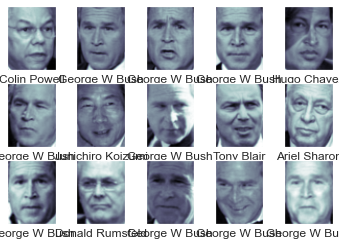

In [45]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
kfold = 10
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))